/home/lpo/.sage/local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


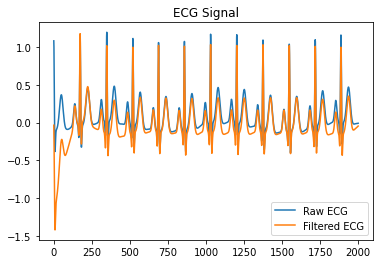

In [1]:
# Loading and Filtering ECG Signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
fs = 200  # Sampling rate
ecg = nk.ecg_simulate(duration=10, sampling_rate=fs)


# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 30, fs)

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

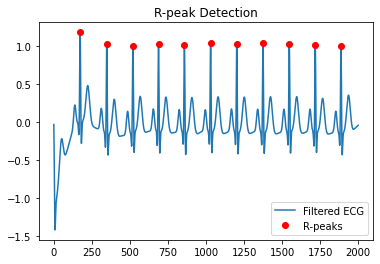

In [2]:
# R-peak Detection

signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

array([70.0525394 , 70.0525394 , 70.0525394 , ..., 71.00591716,
       71.00591716, 71.00591716], shape=(2000,))

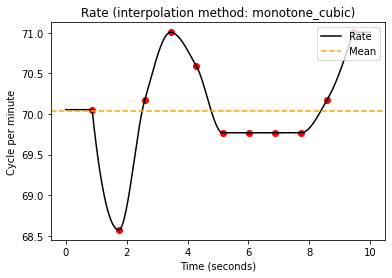

In [3]:
nk.ecg_rate(r_peaks, sampling_rate=fs, desired_length=len(filtered_ecg), show=True)